In [1]:


!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
 97% 153M/158M [00:01<00:00, 111MB/s]
100% 158M/158M [00:01<00:00, 108MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/covid19-image-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers,Model

In [5]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [6]:
import tensorflow as tf

In [62]:
import os

files=os.listdir('/content/Covid19-dataset/train/Covid')
files2=os.listdir('/content/Covid19-dataset/train/Normal')
files3=os.listdir('/content/Covid19-dataset/train/Viral Pneumonia')


num1=(len(files))
num2=(len(files2))
num3=(len(files3))

Text(0.5, 1.0, 'Train Dataset')

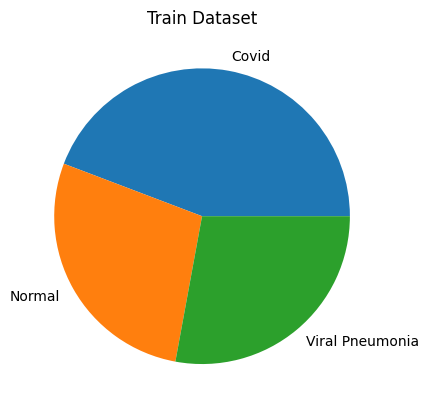

In [67]:
plt.pie([num1,num2,num3],labels=['Covid','Normal','Viral Pneumonia'])
plt.title("Train Dataset")

In [68]:
files=os.listdir('/content/Covid19-dataset/test/Covid')
files2=os.listdir('/content/Covid19-dataset/test/Normal')
files3=os.listdir('/content/Covid19-dataset/test/Viral Pneumonia')


num1=(len(files))
num2=(len(files2))
num3=(len(files3))

Text(0.5, 1.0, 'Test Dataset')

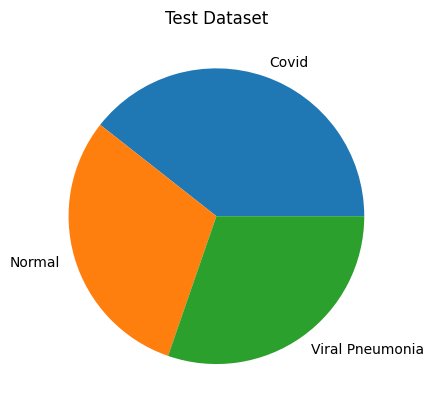

In [70]:
plt.pie([num1,num2,num3],labels=['Covid','Normal','Viral Pneumonia'])
plt.title("Test Dataset")

In [7]:
train_df=tf.keras.utils.image_dataset_from_directory(
    directory='/content/Covid19-dataset/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 251 files belonging to 3 classes.


In [8]:
test_df=tf.keras.utils.image_dataset_from_directory(
    directory='/content/Covid19-dataset/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 66 files belonging to 3 classes.


In [9]:
def process(image,labels):
  image=tf.cast(image/255,tf.float32)
  return image,labels

In [10]:
train_df=train_df.map(process)
test_df=test_df.map(process)

In [33]:
from tensorflow.keras import Sequential,regularizers
from tensorflow.keras.layers import Dropout

In [41]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='valid',input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))
model.add(Conv2D(64,(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))
model.add(Conv2D(128,(3,3),activation='relu',padding='valid'))
model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 flatten_5 (Flatten)         (None, 460800)           

In [43]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [49]:
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

# Define the early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history=model.fit(train_df, epochs=10, validation_data=test_df, callbacks=[early_stopping])

Epoch 1/10
8/8 [==============================] - 7s 203ms/step - loss: 1.5134 - accuracy: 0.7291 - val_loss: 1.3780 - val_accuracy: 0.6364
Epoch 2/10
8/8 [==============================] - 4s 184ms/step - loss: 1.2079 - accuracy: 0.8008 - val_loss: 1.1129 - val_accuracy: 0.8636
Epoch 3/10
8/8 [==============================] - 4s 186ms/step - loss: 0.9579 - accuracy: 0.8725 - val_loss: 0.9856 - val_accuracy: 0.8333
Epoch 4/10
8/8 [==============================] - 5s 187ms/step - loss: 0.8493 - accuracy: 0.8964 - val_loss: 0.8206 - val_accuracy: 0.9091
Epoch 5/10
8/8 [==============================] - 4s 183ms/step - loss: 0.6686 - accuracy: 0.9482 - val_loss: 0.6845 - val_accuracy: 0.9242
Epoch 6/10
8/8 [==============================] - 5s 263ms/step - loss: 0.6499 - accuracy: 0.9283 - val_loss: 0.9203 - val_accuracy: 0.7727
Epoch 7/10
8/8 [==============================] - 4s 135ms/step - loss: 0.6673 - accuracy: 0.9004 - val_loss: 0.7167 - val_accuracy: 0.8636
Epoch 8/10
8/8 [====

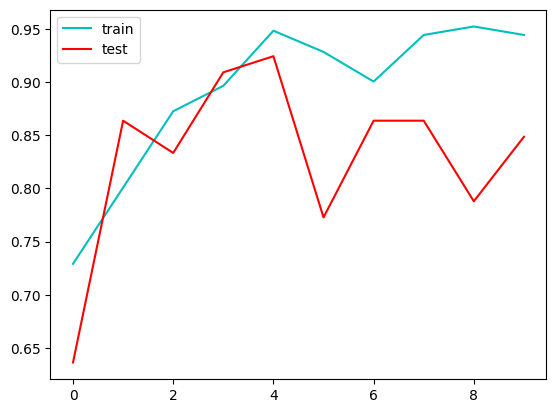

In [50]:


plt.plot(history.history['accuracy'],color='c',label='train')
plt.plot(history.history['val_accuracy'],color='r',label='test')
plt.legend()
plt.show()


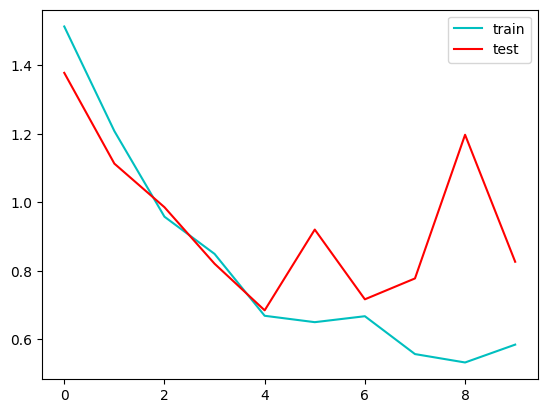

In [51]:

plt.plot(history.history['loss'],color='c',label='train')
plt.plot(history.history['val_loss'],color='r',label='test')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import accuracy_score,mean_squared_error

In [54]:
y_pred=model.predict(test_df)

3/3 [==============================] - 1s 24ms/step
